In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import pandas as pd

# Load GDP data (assuming it has 'Country', 'Year', and 'GDP' columns)
gdp_df = pd.read_csv('GDP by Country 1999-2022.csv')

# Load Population data (assuming it has 'Country', 'Year', and 'Population' columns)
population_df = pd.read_csv('The_World_Bank_Population_growth_(annual_).csv')

# Reshape the GDP DataFrame
gdp_df = pd.melt(gdp_df, id_vars=['Country'], var_name='Year', value_name='GDP')

# Reshape the Population DataFrame
population_df = pd.melt(population_df, id_vars=['country_name', 'country_code'], var_name='Year', value_name='Population')

# Filter the population data to only include years 1999-2022
population_df = population_df[population_df['Year'].between('1999', '2022')]

# Merge the datasets on 'country_name' and 'Year', keeping 'country_code'
combined_df = pd.merge(gdp_df, population_df, left_on=['Country', 'Year'], right_on=['country_name', 'Year'], how='inner')

# Drop the redundant 'country_name' column (already in 'Country')
combined_df.drop(columns=['country_name'], inplace=True)

# Clean the 'GDP' column by removing commas and converting to numeric
combined_df['GDP'] = combined_df['GDP'].replace({',': ''}, regex=True)  # Remove commas
combined_df['GDP'] = pd.to_numeric(combined_df['GDP'], errors='coerce')  # Convert to numeric

# Convert 'Year' to numeric
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')

# Inspect the combined DataFrame
print(combined_df.head())


               Country  Year      GDP country_code  Population
0              Albania  1999    3.444          ALB   -0.633352
1              Algeria  1999   48.845          DZA    1.398429
2               Angola  1999    6.153          AGO    3.226448
3  Antigua and Barbuda  1999    0.652          ATG    1.706407
4            Argentina  1999  283.523          ARG    1.152044


In [4]:
combined_df.loc[combined_df['Country'] == 'Netherlands', 'country_code']='NED'

In [ ]:
combined_df[combined_df['Country'] == 'Netherlands']


,Country,Year,GDP,country_code,Population
154,United States,1999,9268.43,USA,1.148340
314,United States,2000,9816.98,USA,1.112769
474,United States,2001,10127.95,USA,0.989741
634,United States,2002,10469.60,USA,0.927797
794,United States,2003,10960.75,USA,0.859482
954,United States,2004,11712.48,USA,0.925484
1114,United States,2005,12455.83,USA,0.921713
1274,United States,2006,13244.55,USA,0.964254
1434,United States,2007,13770.31,USA,0.951055
1594,United States,2008,14418.48,USA,0.945865


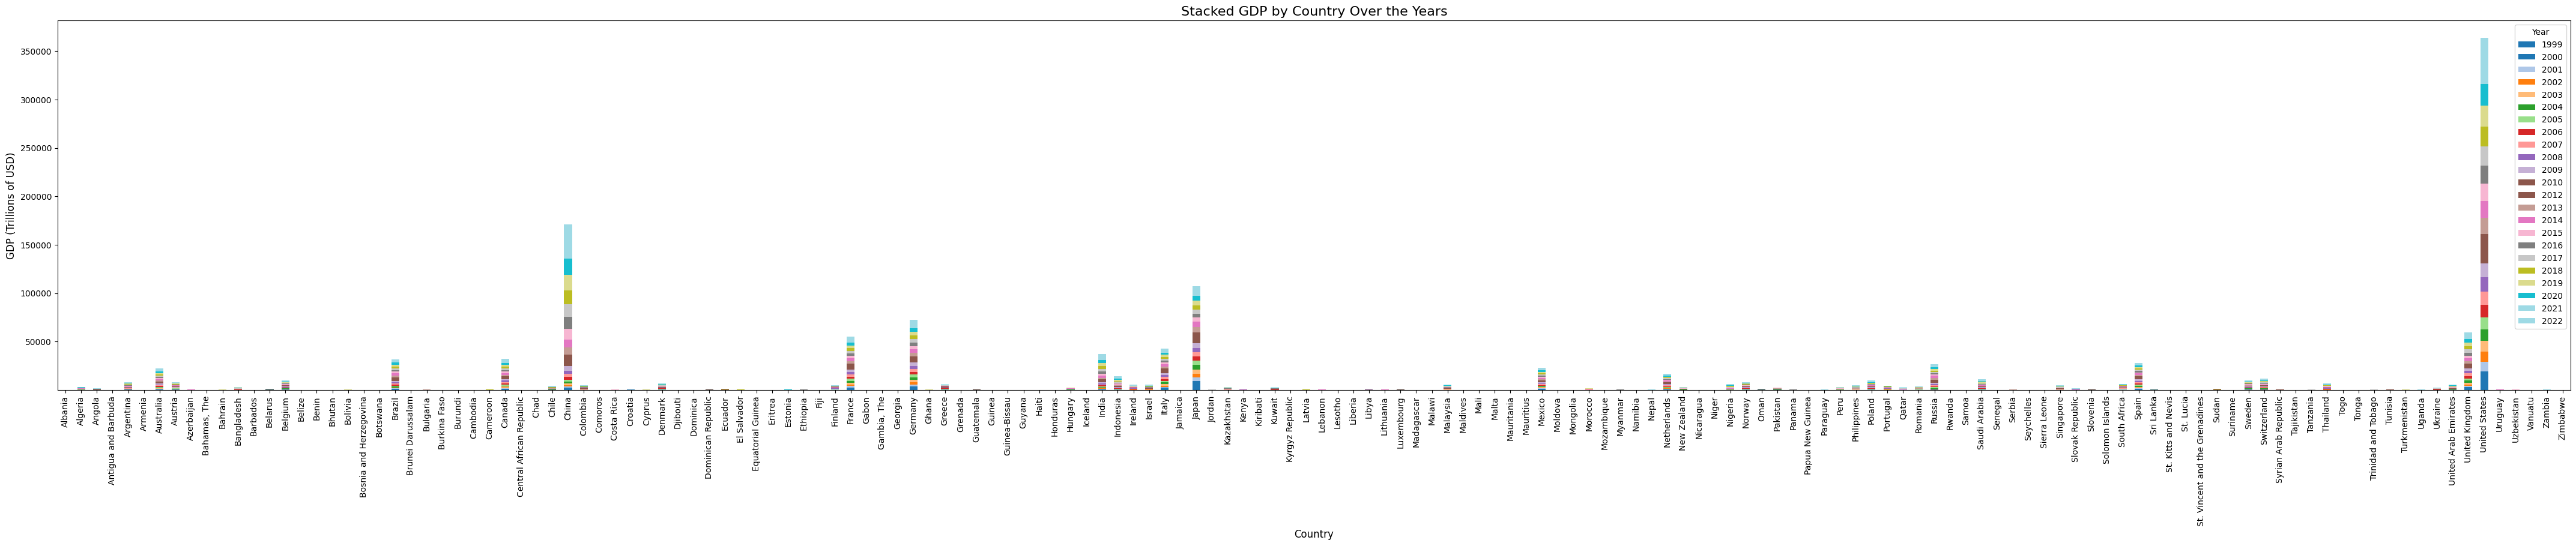

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame
# Example of loading combined_df (Replace this with your actual data)
# combined_df = pd.read_csv('your_data.csv')

# Group by Year and Country, and calculate the sum of GDP
df_grouped = combined_df.groupby(['Year', 'Country','country_code'])['GDP'].sum().reset_index()

# Pivot the data to have years as columns and countries as rows
df_pivot = df_grouped.pivot(index='Country', columns='Year', values='GDP')
# Plot the stacked bar graph
df_pivot.plot(kind='bar', stacked=True, figsize=(54, 8), cmap='tab20')

# Add labels and title
plt.title('Stacked GDP by Country Over the Years', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP (Trillions of USD)', fontsize=12)
plt.xticks(rotation=90)  # Rotate country labels if necessary

# Show the plot
plt.show()



In [7]:
# Step 1: Calculate the total GDP for each country across all years
df_grouped_total_gdp = df_grouped.groupby('Country')['GDP'].sum().reset_index()

# Step 2: Sort the countries by total GDP in descending order
df_grouped_total_gdp = df_grouped_total_gdp.sort_values(by='GDP', ascending=False).reset_index(drop=True)

# Step 3: Display the final table
print(df_grouped_total_gdp)


            Country         GDP
0     United States  363522.210
1             China  171222.600
2             Japan  107529.050
3           Germany   72798.340
4    United Kingdom   59417.110
..              ...         ...
155         Comoros      13.275
156        Dominica       9.644
157     Gambia, The       8.673
158           Tonga       7.520
159        Kiribati       2.663

[160 rows x 2 columns]


# Observation
Here the data showcases that the top countries that have grown their GDP between 1999 - 2022 are:

| Country         | GDP (Trillions of USD) |
|-----------------|------------------------|
| United States   | 363522.210             |
| China           | 171222.600             |
| Japan           | 107529.050             |
| Germany         | 72798.340              |
| United Kingdom  | 59417.110              |


We will be using this to know:
- What country-level factors (e.g., GDP, population) influence medal counts?


In [8]:
# Load and read the datasets 
athlete_events = pd.read_csv('athlete_events.csv')
noc_regions = pd.read_csv('noc_regions.csv')

# Merge the datasets on the 'NOC' column
merged_data = athlete_events.merge(noc_regions, on='NOC', how='left')

# Check for missing values in the 'region' column
missing_regions = merged_data['region'].isnull().sum()

missing_values = merged_data.isnull().sum()

# Drop irrelevant columns (such as 'notes')
cleaned_data = merged_data.drop(columns=['notes'])

# Handle missing values for 'Medal'
cleaned_data['Medal'] = cleaned_data['Medal'].fillna('No Medal')

# Remove duplicate rows
cleaned_data = cleaned_data.drop_duplicates()

# Standardize text data (lowercase for consistency)
cleaned_data['Sex'] = cleaned_data['Sex'].str.lower()
cleaned_data['Sport'] = cleaned_data['Sport'].str.lower()

# Add a binary column for medal presence
cleaned_data['Medal_Won'] = cleaned_data['Medal'].apply(lambda x: 0 if x == 'No Medal' else 1)

# Check for missing values after cleaning
missing_values_after_cleaning = cleaned_data.isnull().sum()

# Getting mean value depending on the gender
gender_means = cleaned_data.groupby('Sex')[['Height', 'Weight']].mean().round(1)

for gender in cleaned_data['Sex'].unique():
    gender_mask = cleaned_data['Sex'] == gender

    # Fill height
    height_mask = gender_mask & cleaned_data['Height'].isna()
    cleaned_data.loc[height_mask, 'Height'] = gender_means.loc[gender, 'Height']

    # Fill weight
    weight_mask = gender_mask & cleaned_data['Weight'].isna()
    cleaned_data.loc[weight_mask, 'Weight'] = gender_means.loc[gender, 'Weight']

# Round Data to one decimal
cleaned_data[['Height', 'Weight']] = cleaned_data[['Height', 'Weight']].round(1)


print(gender_means)
print()
cleaned_data.head()

     Height  Weight
Sex                
f     167.8    60.0
m     178.9    75.7



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Medal_Won
0,1,A Dijiang,m,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,basketball,Basketball Men's Basketball,No Medal,China,0
1,2,A Lamusi,m,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,judo,Judo Men's Extra-Lightweight,No Medal,China,0
2,3,Gunnar Nielsen Aaby,m,24.0,178.9,75.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,football,Football Men's Football,No Medal,Denmark,0
3,4,Edgar Lindenau Aabye,m,34.0,178.9,75.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,tug-of-war,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1
4,5,Christine Jacoba Aaftink,f,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,speed skating,Speed Skating Women's 500 metres,No Medal,Netherlands,0


In [9]:
## Converts Male to 1 and Female to 0
le = LabelEncoder()
sex = le.fit_transform(cleaned_data['Sex'])
cleaned_data.drop("Sex", axis=1, inplace=True)
cleaned_data["Sex"] = sex
cleaned_data.head()

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Medal_Won,Sex
0,1,A Dijiang,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,basketball,Basketball Men's Basketball,No Medal,China,0,1
1,2,A Lamusi,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,judo,Judo Men's Extra-Lightweight,No Medal,China,0,1
2,3,Gunnar Nielsen Aaby,24.0,178.9,75.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,football,Football Men's Football,No Medal,Denmark,0,1
3,4,Edgar Lindenau Aabye,34.0,178.9,75.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,tug-of-war,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,1
4,5,Christine Jacoba Aaftink,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,speed skating,Speed Skating Women's 500 metres,No Medal,Netherlands,0,0


### Observations from Data Cleaning and Exploration:

1. **Data Merging:**  
   The datasets **athlete_events** and **noc_regions** were successfully merged on the **'NOC'** column, adding country-level **'region'** information.

2. **Missing Values Handling:**  
   - Missing **'Medal'** values were filled with **'No Medal'**.
   - Missing **'Height'** and **'Weight'** values were imputed using gender-specific mean values.
   
3. **Standardization:**  
   The **'Sex'** and **'Sport'** columns were standardized to lowercase for consistency.

4. **Binary Medal Indicator:**  
   A new **'Medal_Won'** column was created to indicate whether an athlete won a medal (1) or not (0).

5. **Duplication Removal:**  
   Duplicate rows were removed to ensure unique athlete records.

6. **GDP and Population Integration (Future Step):**  
   GDP and population data will be integrated to explore how economic factors impact Olympic performance.


# Data Exploration

- Q1. Which countries tend to win the most medals, and why?
- Q2. Which sports contribute the most to a country's overall medal count?
- Q3. What is the impact of Hosting Influence on Medals?
- Q4. What country-level factors (e.g., GDP, population) influence medal counts?

In [10]:
medal_per_country = cleaned_data[['region', 'Medal', 'Medal_Won']].copy()
medal_per_country.head()

,region,Medal,Medal_Won
0,China,No Medal,0
1,China,No Medal,0
2,Denmark,No Medal,0
3,Denmark,Gold,1
4,Netherlands,No Medal,0


- Q1. Which countries tend to win the most medals, and why?

In [11]:
count_medals = cleaned_data[cleaned_data['Medal_Won'] == 1]['region'].value_counts()
top_countries = count_medals.head(5)
print(top_countries)

region
USA        5637
Russia     3947
Germany    3756
UK         2067
France     1767
Name: count, dtype: int64


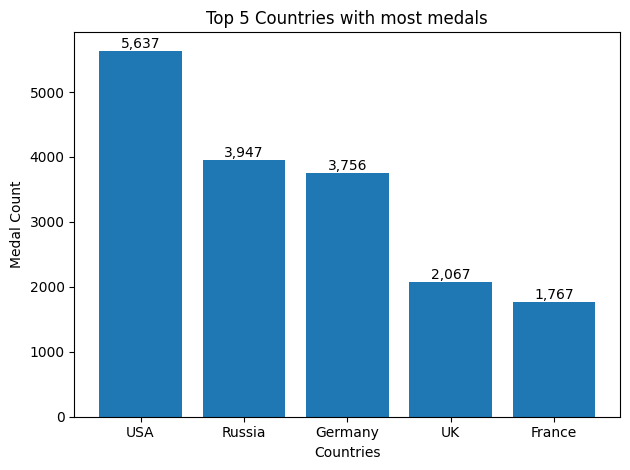

In [12]:
fig, ax = plt.subplots()
plt.title("Top 5 Countries with most medals")
# Assign x and y coordinates
bars = ax.bar(top_countries.index , top_countries.values)

# Add x and y labels
plt.xlabel("Countries")
plt.ylabel("Medal Count")

# Go through each bar and add its value on top of it
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Observations

We can observe that the top 5 countries are mostly countries that are economically powerful, being USA the world power and getting the most amount of medals

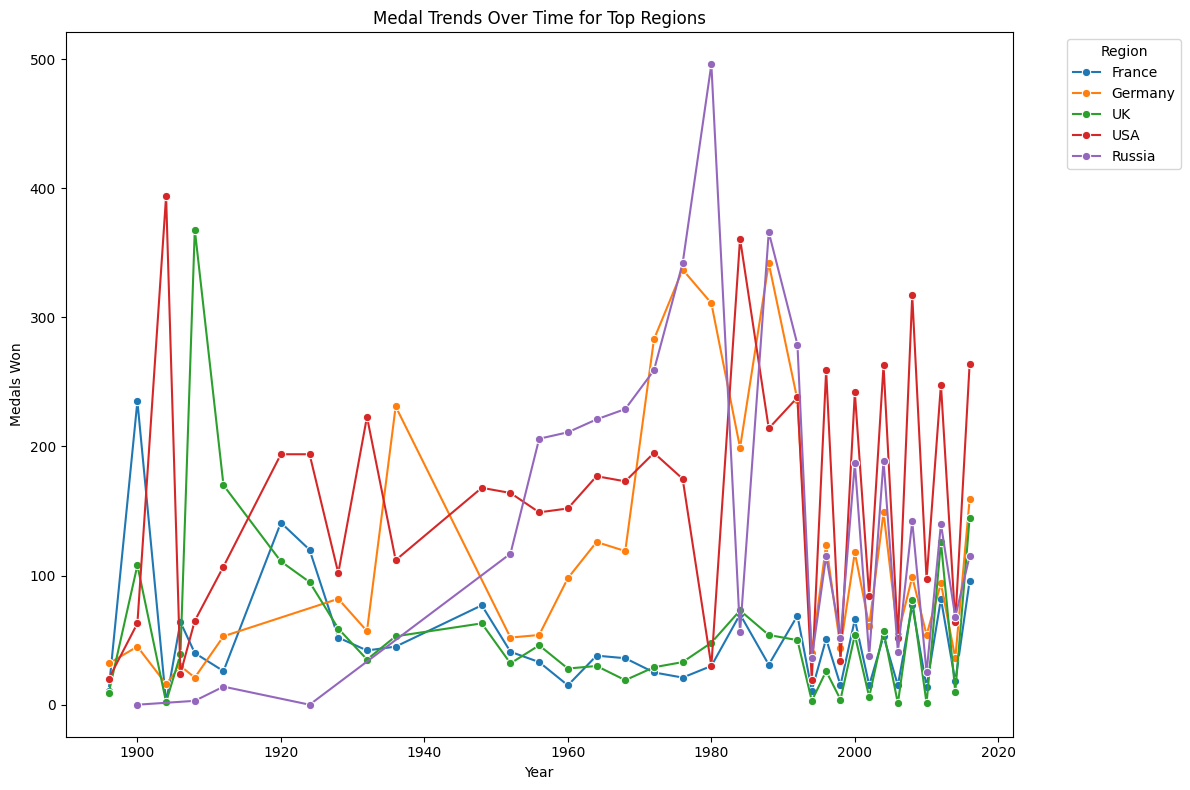

In [13]:
# Data cleaning and preprocessing
merged_data['Medal_Won'] = merged_data['Medal'].notnull().astype(int)  # Binary target: Medal won or not

# Analysis for Most Likely Combination of Country, Region, and Sport
medal_by_region_sport = merged_data.groupby(['region', 'Sport'])['Medal_Won'].sum().reset_index()
top_sport_regions = medal_by_region_sport.sort_values(by='Medal_Won', ascending=False).head(10)

# Analysis for Trends in Medal Counts Over Time
medals_over_time = merged_data.groupby(['Year', 'region'])['Medal_Won'].sum().reset_index()

# Selecting top regions for visualization
top_regions = medals_over_time.groupby('region')['Medal_Won'].sum().nlargest(5).index
medals_over_time_filtered = medals_over_time[medals_over_time['region'].isin(top_regions)]

# Plot trends over time for top regions
plt.figure(figsize=(12, 8))
sns.lineplot(data=medals_over_time_filtered, x='Year', y='Medal_Won', hue='region', marker='o')
plt.title("Medal Trends Over Time for Top Regions")
plt.xlabel("Year")
plt.ylabel("Medals Won")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

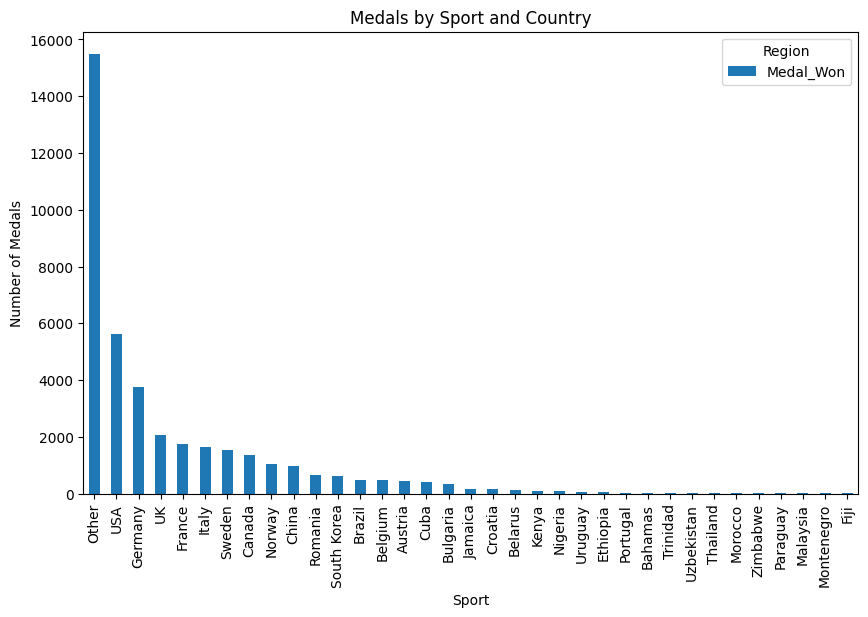

In [14]:
sport_medals = cleaned_data[cleaned_data['Medal_Won'] == 1].groupby(['Sport', 'region'])['Medal_Won'].count().reset_index()

# Grouping regions with less medals than threshold to other
threshold = 10
sport_medals['region'] = sport_medals['region'].apply(lambda x: x if sport_medals[sport_medals['region'] == x]['Medal_Won'].values[0] >= threshold else 'Other')
aggregated = sport_medals.groupby('region')['Medal_Won'].sum().sort_values(ascending=False)
aggregated.plot(kind='bar', figsize=(10,6))
plt.title('Medals by Sport and Country')
plt.ylabel('Number of Medals')
plt.xlabel('Sport')
plt.legend(title='Region')
plt.show()

- Q2. Which sports contribute the most to a country's overall medal count?

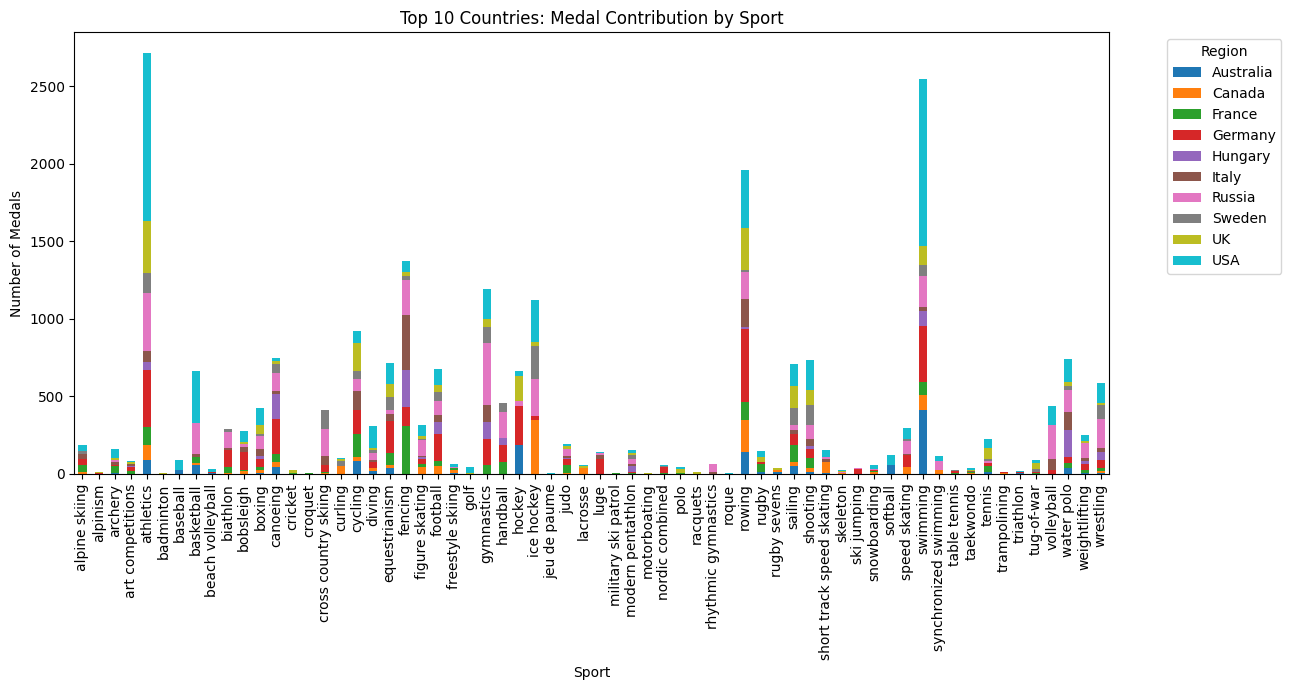

In [15]:
country_medals = cleaned_data[cleaned_data['Medal_Won'] == 1].groupby('region')['Medal_Won'].count().reset_index()
top_countries = country_medals.nlargest(10, 'Medal_Won')['region']

# Filter dataset for top countries
filtered_df = cleaned_data[cleaned_data['region'].isin(top_countries)]

# Re-aggregate by sport and region
filtered_sport_medals = filtered_df[filtered_df['Medal_Won'] == 1].groupby(['Sport', 'region'])['Medal_Won'].count().reset_index()
sport_medals_pivot = filtered_sport_medals.pivot(index='Sport', columns='region', values='Medal_Won').fillna(0)

# Plot
sport_medals_pivot.plot(kind='bar', stacked=True, figsize=(13, 7))
plt.title("Top 10 Countries: Medal Contribution by Sport")
plt.ylabel("Number of Medals")
plt.xlabel("Sport")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

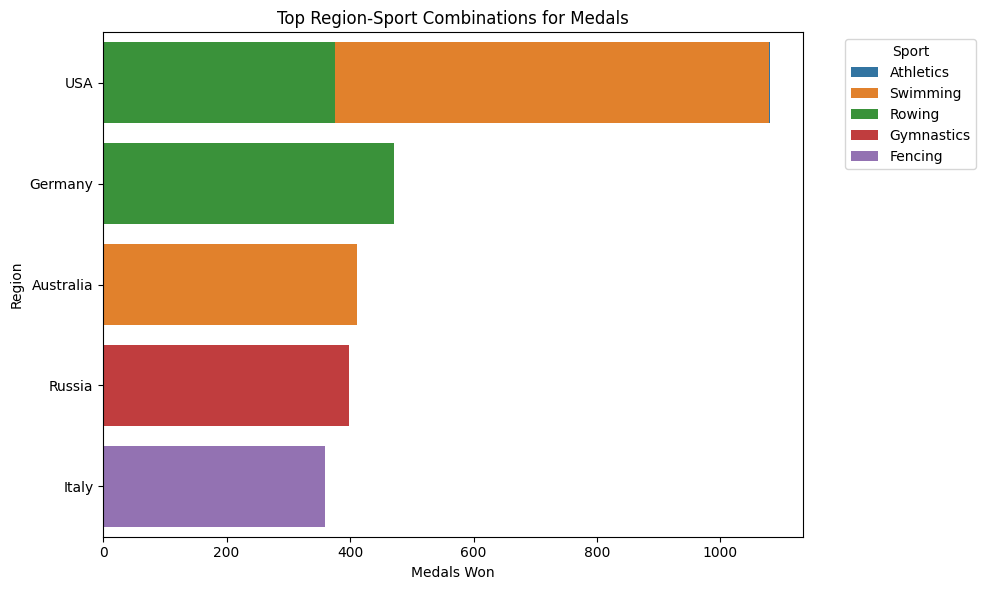

In [16]:
"""
# Data cleaning and preprocessing
merged_data['Medal_Won'] = merged_data['Medal'].notnull().astype(int)  # Binary target: Medal won or not

# Analysis for Most Likely Combination of Country, Region, and Sport
medal_by_region_sport = merged_data.groupby(['region', 'Sport'])['Medal_Won'].sum().reset_index()
top_sport_regions = medal_by_region_sport.sort_values(by='Medal_Won', ascending=False).head(10)

"""

# Visualizing the top region-sport combinations contributing to medals
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sport_regions, x='Medal_Won', y='region', hue='Sport', dodge=False)
plt.title("Top Region-Sport Combinations for Medals")
plt.xlabel("Medals Won")
plt.ylabel("Region")
plt.legend(title="Sport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Q3. What is the impact of Hosting Influence on Medals?

In [17]:
from scipy.stats import ttest_ind

# Hosting Influence on Medal Counts
host_years = {2020: 'Japan', 2016: 'Brazil', 2012: 'United Kingdom', 2008: 'China'}  # Example years
merged_data['Is_Host'] = merged_data.apply(
    lambda row: 1 if row['Year'] in host_years and row['region'] == host_years[row['Year']] else 0, axis=1)

# Compare medal counts for hosting vs. non-hosting years
hosting_medals = merged_data.groupby(['region', 'Is_Host'])['Medal_Won'].sum().reset_index()

# Perform a statistical test
host_medals = hosting_medals[hosting_medals['Is_Host'] == 1]['Medal_Won']
non_host_medals = hosting_medals[hosting_medals['Is_Host'] == 0]['Medal_Won']
t_stat, p_value = ttest_ind(host_medals, non_host_medals, nan_policy='omit')

# Print statistical test results
print("Hosting Influence on Medals:")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

Hosting Influence on Medals:
T-statistic: -0.17, P-value: 0.8644


The t-statistic measures the difference in means between the two groups, hosting vs non-hosting countires and the p-value represent the probability that the observed difference in the means occurred due to random chance. The t-statistic of -0.17 suggest that there is no significant difference in the average medal counts and the high p-value suggest that there is no evidence to support that the hosting country influences a country's count.

In [18]:
# Pivot the data to have countries as rows and columns as Is_Host (0 for non-host, 1 for host)
stacked_data = hosting_medals.pivot_table(index='region', columns='Is_Host', values='Medal_Won', aggfunc='sum', fill_value=0)

# Rename columns for better understanding
stacked_data.columns = ['Non-Host Medals', 'Host Medals']



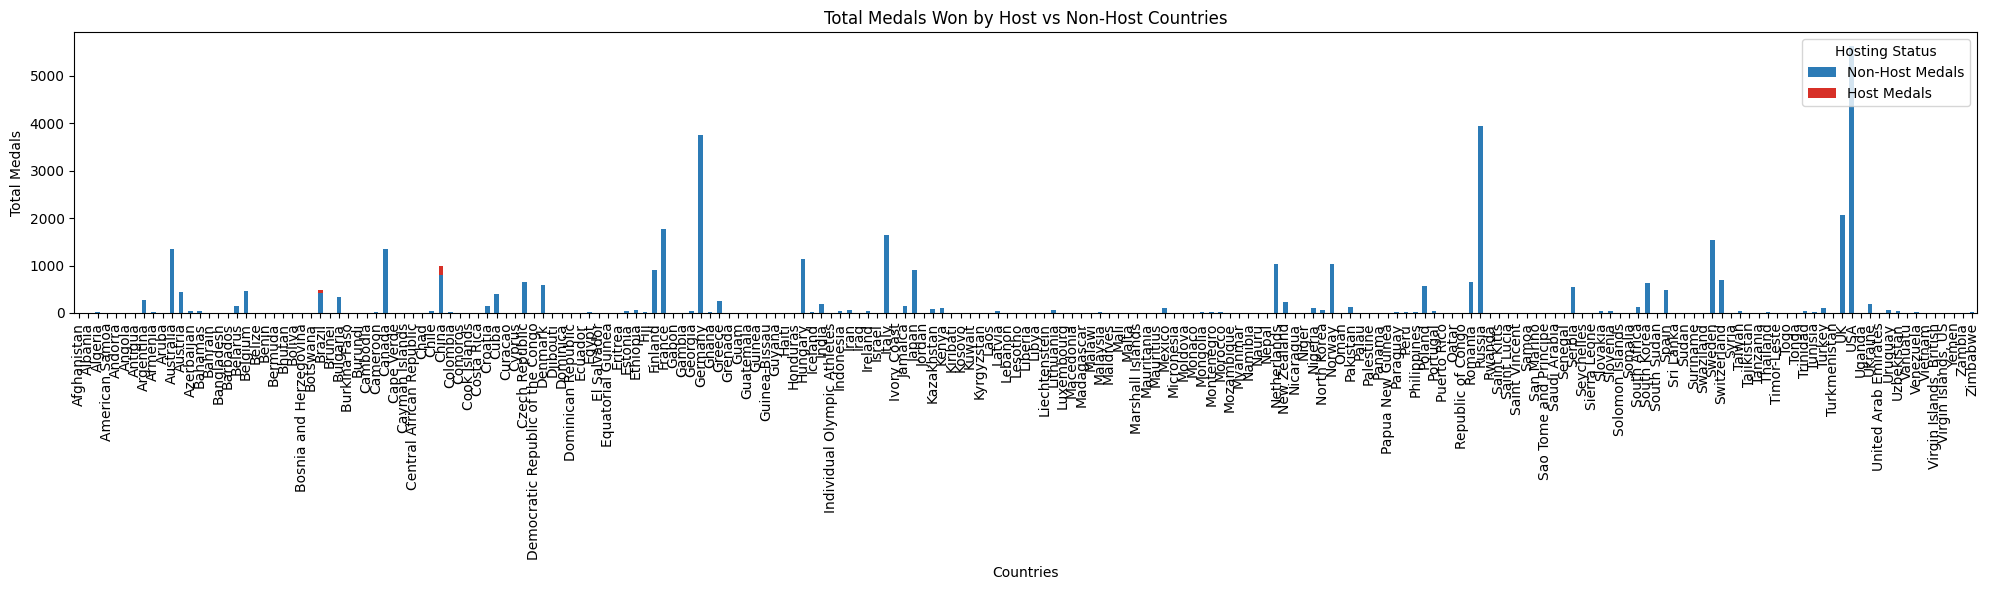

In [19]:
import matplotlib.pyplot as plt

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(20, 6), color=['#2c7bb6', '#d73027'])

# Customize the plot
plt.title('Total Medals Won by Host vs Non-Host Countries')
plt.xlabel('Countries')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
plt.legend(title='Hosting Status', loc='upper right', labels=['Non-Host Medals', 'Host Medals'])
plt.tight_layout()

# Show the plot
plt.show()


In [20]:
stacked_data[stacked_data['Host Medals'] > 0]

,Non-Host Medals,Host Medals
region,,
Brazil,425,50
China,809,184


- For both Brazil and China, the total number of medals won in non-hosting years was higher than the medals won when they hosted the Olympics. This could indicate that hosting the Olympics did not significantly boost their performance in terms of medal counts.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     69407
           1       0.27      0.34      0.30     11928

    accuracy                           0.77     81335
   macro avg       0.58      0.59      0.58     81335
weighted avg       0.79      0.77      0.78     81335

Confusion Matrix:
[[58349 11058]
 [ 7832  4096]]


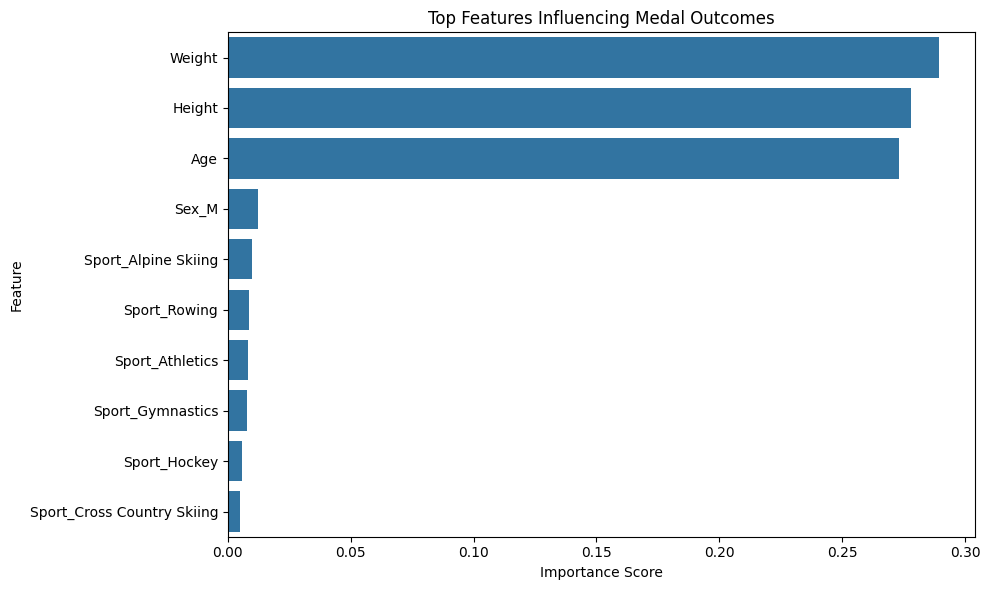

In [21]:
# Analysis for Factors Influencing Medal Outcomes
# Feature engineering for predictive modeling
features = ['Age', 'Height', 'Weight', 'Sex', 'Sport']
encoded_data = pd.get_dummies(merged_data[features], drop_first=True)
X = encoded_data
y = merged_data['Medal_Won']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Plot feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature')
plt.title("Top Features Influencing Medal Outcomes")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The model performs well for the No Medal class with high precision and recall but struggles with the Medal won class. This model is also biased toward predicitng No Medal since it has a much larger support.

In [22]:
# Analysis for Predicting Specific Event Outcomes
# Focus on a single sport
swimming_data = merged_data[merged_data['Sport'] == 'Swimming']

# Prepare features and target
features = ['Age', 'Height', 'Weight', 'Sex']
encoded_swimming_data = pd.get_dummies(swimming_data[features], drop_first=True)
X_swimming = encoded_swimming_data
y_swimming = swimming_data['Medal_Won']

# Split data for swimming
X_train_swim, X_test_swim, y_train_swim, y_test_swim = train_test_split(X_swimming, y_swimming, test_size=0.3, random_state=42)

# Train LightGBM for swimming
from lightgbm import LGBMClassifier
lgbm_model_swim = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, class_weight='balanced', random_state=42)
lgbm_model_swim.fit(X_train_swim, y_train_swim)

# Evaluate the LightGBM model for swimming
y_pred_swim = lgbm_model_swim.predict(X_test_swim)
print("LightGBM Classification Report for Swimming:")
print(classification_report(y_test_swim, y_pred_swim))
print("Confusion Matrix for Swimming:")
print(confusion_matrix(y_test_swim, y_pred_swim))

[LightGBM] [Info] Number of positive: 2132, number of negative: 14104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 16236, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

This model shows that No Medal has more support compared to Medal Won support of 916 instances making the peformance skewed. Just like the Random Forest, the Light GBM struggles to correctly classify Medal Won but performs well at identifying No Medal instances. But the recall of 60% indictaes that the model captures more actual Medal Won instances than randomly guessing.

# 4 What country-level factors (e.g., GDP) influence medal counts?

In [39]:
merged_data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Medal_Won', 'Is_Host'],
      dtype='object')

In [56]:
merged_data.loc[merged_data['NOC'] == 'USA','region']='United States'

In [57]:
# Merge cleaned_data with GDP data on 'Country' and 'Year'
medal_gdp_data = merged_data.merge(df_grouped[['Year', 'Country', 'GDP']], 
                                    left_on=['region', 'Year'], 
                                    right_on=['Country', 'Year'], 
                                    how='left') 

# Inspect the merged data
print(medal_gdp_data.head())



   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  ...       City          Sport  \
0  CHN  1992 Summer  1992  ...  Barcelona     Basketball   
1  CHN  2012 Summer  2012  ...     London           Judo   
2  DEN  1920 Summer  1920  ...  Antwerpen       Football   
3  DEN  1900 Summer  1900  ...      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  ...    Calgary  Speed Skating   

                              Event Medal       region notes Medal_Won  \
0       Basketball Men's Basketball   NaN        China   NaN         0   
1      Judo Men's Extra-Ligh

In [59]:
medal_gdp_data[medal_gdp_data['region']=='United States']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Medal_Won,Is_Host,Country,GDP
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,...,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,United States,NaN,0,0,NaN,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,...,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,United States,NaN,0,0,NaN,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,...,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,United States,NaN,0,0,NaN,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,...,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,United States,NaN,0,0,NaN,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,...,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,United States,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270850,135458,Rami Zur,M,27.0,175.0,77.0,United States,USA,2004 Summer,2004,...,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN,United States,NaN,0,0,United States,11712.48
270851,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,...,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN,United States,NaN,0,0,United States,14418.48
270852,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,...,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN,United States,NaN,0,0,United States,14418.48
271044,135543,"Victor Andrew ""Vic"" Zwolak",M,25.0,175.0,64.0,United States,USA,1964 Summer,1964,...,Tokyo,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN,United States,NaN,0,0,NaN,NaN


In [60]:
# medal_gdp_data.loc[medal_gdp_data['country_code'] == 'SGP', 'region'] = 'Singapore'
#medal_gdp_data[medal_gdp_data['NOC']== 'NED']
medal_gdp_data.loc[medal_gdp_data['region'] == 'Netherlands', 'country_code'] = 'NED'

In [61]:
medal_gdp_data[medal_gdp_data['NOC']== 'NED']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,notes,Medal_Won,Is_Host,Country,GDP,country_code
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,NaN,NaN,NED
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,0,0,NaN,NaN,NED
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,...,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,NaN,NaN,NED
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,...,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,0,0,NaN,NaN,NED
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,...,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,NaN,NaN,NED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271047,135545,Henk Jan Zwolle,M,23.0,197.0,93.0,Netherlands,NED,1988 Summer,1988,...,Rowing,Rowing Men's Single Sculls,NaN,Netherlands,NaN,0,0,NaN,NaN,NED
271048,135545,Henk Jan Zwolle,M,27.0,197.0,93.0,Netherlands,NED,1992 Summer,1992,...,Rowing,Rowing Men's Double Sculls,Bronze,Netherlands,NaN,1,0,NaN,NaN,NED
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,...,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN,1,0,NaN,NaN,NED
271050,135546,Sandra Kornelia Zwolle,F,26.0,174.0,65.0,Netherlands,NED,1998 Winter,1998,...,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,NaN,NaN,NED


In [62]:
medal_gdp_data['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'United States', 'Finland',
       'Norway', 'Romania', 'Estonia', 'France', 'Morocco', 'Spain',
       'Egypt', 'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan',
       'Sudan', 'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece',
       'Cameroon', 'Turkey', 'Chile', 'Mexico', 'Nicaragua', 'Hungary',
       'Nigeria', 'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq',
       'Syria', 'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada',
       'Ireland', 'Australia', 'South Africa', 'Eritrea', 'Tanzania',
       'Jordan', 'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine',
       'Comoros', 'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia',
       'Maldives', 'Ethiopia', 'United Arab Emirates', 'Yemen',
       'Indonesia', 'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan',
       'Tajikistan', 'Japan', 'Republic of Congo', 'Switzerland',
       'Brazil', 'Monaco', 'Israel', 'Uruguay', 'Sweden',
       'Virgin Islands, US', 'Sri Lanka', 'Armeni

In [63]:
medal_gdp_data.loc[medal_gdp_data['NOC'] == 'SGP', 'region'] = 'Singapore'

In [64]:
# Filter the data for the years 1999 to 2022 and get the unique country codes
# Check for NaN values in the 'region' column using isnull()
# Filter the data for the years 1999 to 2022
filtered_data = medal_gdp_data[(medal_gdp_data['Year'] >= 1999) & (medal_gdp_data['Year'] <= 2022)]

# Check for NaN values in the 'region' column within the filtered data
nan_values_in_region = filtered_data['region'].isna().sum()

# Print the result
print(f"Number of NaN values in 'region' column for the years 1999-2022: {nan_values_in_region}")


Number of NaN values in 'region' column for the years 1999-2022: 19


So the 19 NAN are the TUV=Tuvalu and the ROT=Refugee Olympic Team

In [65]:
filtered_data_temp = filtered_data.dropna(subset=['GDP'])


In [66]:
filtered_data_temp.columns  

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Medal_Won', 'Is_Host', 'Country', 'GDP', 'country_code'],
      dtype='object')

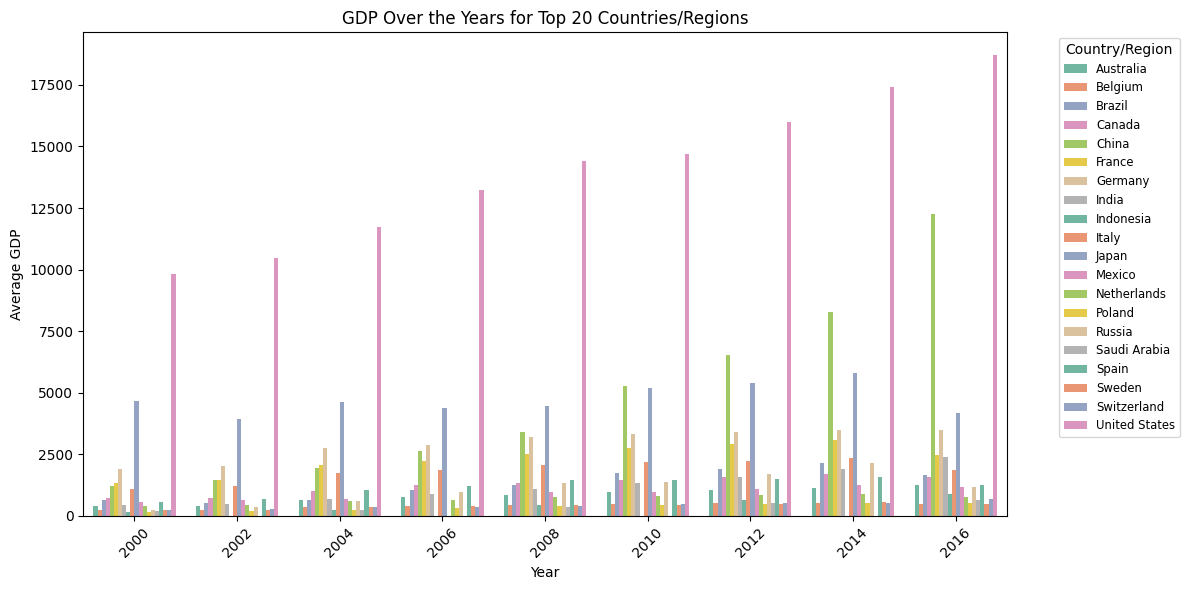

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate GDP data by country and year
gdp_over_years = filtered_data_temp.groupby(['Year', 'region']).agg(
    GDP=('GDP', 'mean')
).reset_index()

# Sort by GDP and get the top 20 countries based on average GDP
top_20_countries = gdp_over_years.groupby('region')['GDP'].mean().sort_values(ascending=False).head(20).index
top_20_gdp = gdp_over_years[gdp_over_years['region'].isin(top_20_countries)]

# Define a custom color palette
# You can specify colors manually or use a Seaborn palette like "Set2", "Set3", or "tab20"
unique_colors = sns.color_palette("Set2", n_colors=len(top_20_countries))

# Plot GDP over the years for the top 20 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_gdp, x='Year', y='GDP', hue='region', palette=unique_colors)

# Title and labels
plt.title('GDP Over the Years for Top 20 Countries/Regions')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.xticks(rotation=45)

# Adjust the legend to avoid overlap
plt.legend(title='Country/Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Show the plot
plt.tight_layout()  # Ensures that the plot elements fit within the figure
plt.show()


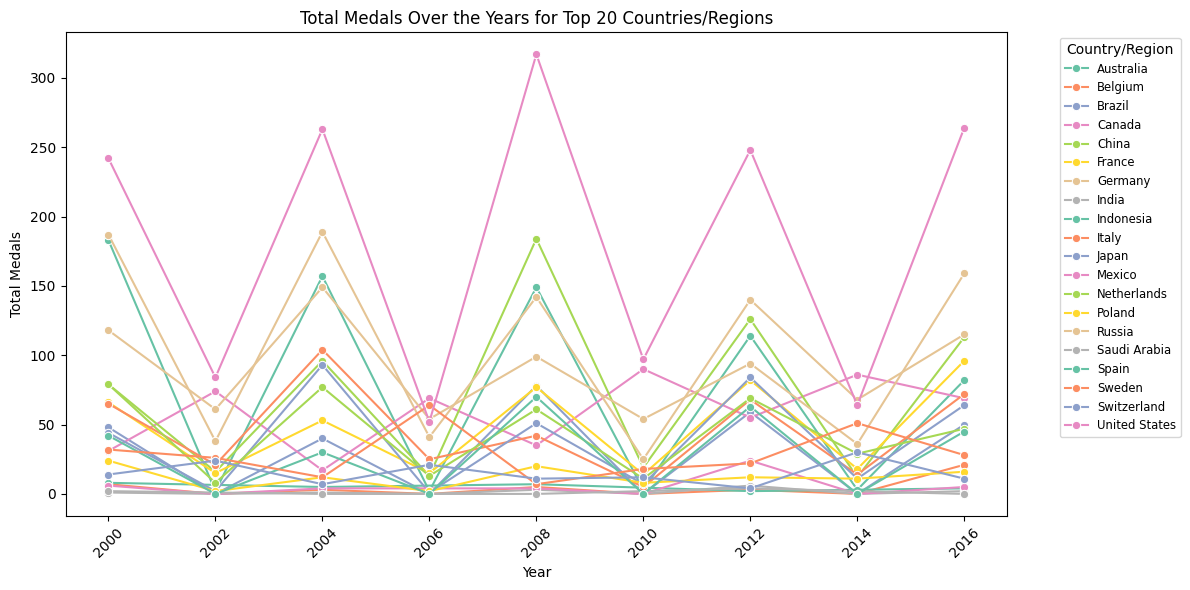

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate the medal data by country and year
medals_over_years = filtered_data_temp.groupby(['Year', 'region']).agg(
    Total_Medals=('Medal_Won', 'sum')
).reset_index()

# Get the top 20 countries based on GDP (as done previously)
top_20_countries = gdp_over_years.groupby('region')['GDP'].mean().sort_values(ascending=False).head(20).index
top_20_medals = medals_over_years[medals_over_years['region'].isin(top_20_countries)]

# Plot the number of medals won over the years for the top 20 countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_20_medals, x='Year', y='Total_Medals', hue='region', marker='o', palette=unique_colors)

# Title and labels
plt.title('Total Medals Over the Years for Top 20 Countries/Regions')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)

# Adjust the legend to avoid overlap
plt.legend(title='Country/Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Show the plot
plt.tight_layout()  # Ensures that the plot elements fit within the figure
plt.show()


In [73]:
filtered_data_temp.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Medal_Won', 'Is_Host', 'Country', 'GDP', 'country_code'],
      dtype='object')

Correlation Matrix:
                    GDP  Total_Medals
GDP           1.000000      0.660141
Total_Medals  0.660141      1.000000


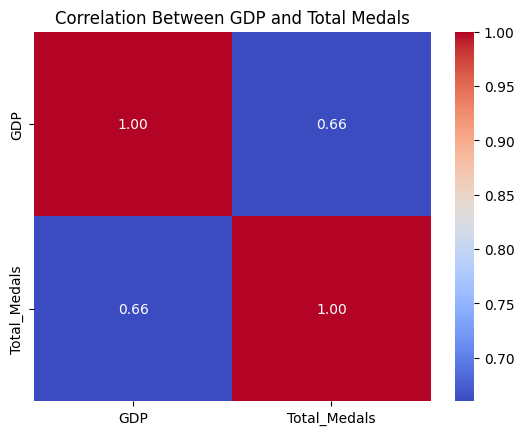

In short, the correlation matrix shows a moderate positive correlation of 0.653 between GDP and Total Medals. This means that as a country's GDP increases, its total number of Olympic medals tends to increase as well. 
                    GDP  Total_Medals
GDP           1.000000      0.660141
Total_Medals  0.660141      1.000000


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate the GDP and Medal data by year and region
gdp_medals = filtered_data_temp.groupby(['Year', 'region']).agg(
    GDP=('GDP', 'mean'),
    Total_Medals=('Medal_Won', 'sum')
).reset_index()

# Calculate the correlation between GDP and Total Medals for each year
correlation = gdp_medals[['GDP', 'Total_Medals']].corr()

print("Correlation Matrix:\n", correlation)

# Plotting the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between GDP and Total Medals")
plt.show()
print("In short, the correlation matrix shows a moderate positive correlation of 0.653 between GDP and Total Medals. This means that as a country's GDP increases, its total number of Olympic medals tends to increase as well. \n", correlation)



### TO IMPROVE THE CORRELATION

#### STEP 1

In [119]:
del df_test

NameError: name 'df_test' is not defined

In [120]:
# Handling missing values
df_test=filtered_data_temp
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Handling Missing Values
df_test['GDP'].fillna(df_test['GDP'].median(), inplace=True)  # For GDP
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)  # For Age
df_test['Height'].fillna(df_test['Height'].median(), inplace=True)  # For Height
df_test['Weight'].fillna(df_test['Weight'].median(), inplace=True)  # For Weight
df_test['Sport'].fillna(df_test['Sport'].mode()[0], inplace=True)  # For Sport
df_test['Event'].fillna(df_test['Event'].mode()[0], inplace=True)  # For Event

# Step 2: Feature Engineering

# a. Log Transformation (for GDP and Medal_Won)
df_test['Log_GDP'] = np.log(df_test['GDP'] + 1)  # Log transformation for GDP
df_test['Log_Medal_Won'] = np.log(df_test['Medal_Won'] + 1)  # Log transformation for Medal count

# b. Interaction Features (e.g., GDP * Age, GDP * Is_Host)
df_test['GDP_Age'] = df_test['GDP'] * df_test['Age']  # Interaction between GDP and Age
df_test['GDP_Is_Host'] = df_test['GDP'] * df_test['Is_Host']  # Interaction between GDP and Host

# c. Temporal Features (GDP and Medal Growth per Year)
df_test['GDP_growth'] = df_test.groupby('Country')['GDP'].pct_change()  # Percent change in GDP per year
df_test['Medal_growth'] = df_test.groupby('Country')['Medal_Won'].pct_change()  # Percent change in medals per year


# Impute missing values with the median of the column
df_test['Medal_growth'].fillna(df_test['Medal_growth'].median(), inplace=True)
# Impute missing values with the mean of the column
# df_test['Medal_growth'].fillna(df_test['Medal_growth'].mean(), inplace=True)


# d. Categorical Encoding (One-Hot for Sport and Event, Label Encoding for Sex and Is_Host)
df_test = pd.get_dummies(df_test, columns=['Sport', 'Event'], drop_first=True)  # One-hot encoding for Sport and Event

# Label Encoding for binary features
label_encoder = LabelEncoder()
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])  # Male = 1, Female = 0
df_test['Is_Host'] = label_encoder.fit_transform(df_test['Is_Host'])  # 1 if host, 0 if not

# e. Aggregating Country-Level Features (Total Medals, Average Age, Height, Weight)
country_agg = df_test.groupby('Country').agg({
    'Medal_Won': 'sum',  # Total medals won by the country
    'Age': 'mean',       # Average age of athletes
    'Height': 'mean',    # Average height of athletes
    'Weight': 'mean',    # Average weight of athletes
}).reset_index()

df_test = df_test.merge(country_agg, on='Country', suffixes=('', '_Country'))

# Step 3: Handle Outliers
GDP_cap = df_test['GDP'].quantile(0.95)
df_test['GDP'] = np.where(df_test['GDP'] > GDP_cap, GDP_cap, df_test['GDP'])

Medal_cap = df_test['Medal_Won'].quantile(0.95)
df_test['Medal_Won'] = np.where(df_test['Medal_Won'] > Medal_cap, Medal_cap, df_test['Medal_Won'])

# Step 4: Standardization/Normalization of Features
scaler = StandardScaler()
df_test[['Age', 'Height', 'Weight', 'GDP']] = scaler.fit_transform(df_test[['Age', 'Height', 'Weight', 'GDP']])

# At this point, df_test is ready for training and testing models.



C:\Users\12167\AppData\Local\Temp\ipykernel_31708\3379222302.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['GDP'].fillna(df_test['GDP'].median(), inplace=True)  # For GDP
C:\Users\12167\AppData\Local\Temp\ipykernel_31708\3379222302.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['GDP'].fillna(df_test['GDP'].median(), 

We Dont have the population so trying different way 

                         ID       Sex       Age    Height    Weight      Year  \
ID                 1.000000 -0.033523 -0.009822 -0.011035 -0.010466 -0.009344   
Sex               -0.033523  1.000000  0.119154  0.542895  0.547140 -0.039682   
Age               -0.009822  0.119154  1.000000  0.126494  0.174742  0.040396   
Height            -0.011035  0.542895  0.126494  1.000000  0.795246  0.001886   
Weight            -0.010466  0.547140  0.174742  0.795246  1.000000 -0.002565   
Year              -0.009344 -0.039682  0.040396  0.001886 -0.002565  1.000000   
Medal_Won          0.013388 -0.034521  0.025984  0.072239  0.070479  0.001904   
Is_Host            0.029232 -0.011604 -0.013583 -0.004849 -0.007681  0.086908   
GDP                0.027638 -0.050939  0.009630 -0.019672 -0.002330  0.123038   
Log_GDP            0.023898 -0.074277  0.046350 -0.021161 -0.026273  0.185644   
Log_Medal_Won      0.013388 -0.034521  0.025984  0.072239  0.070479  0.001904   
GDP_Is_Host        0.042934 

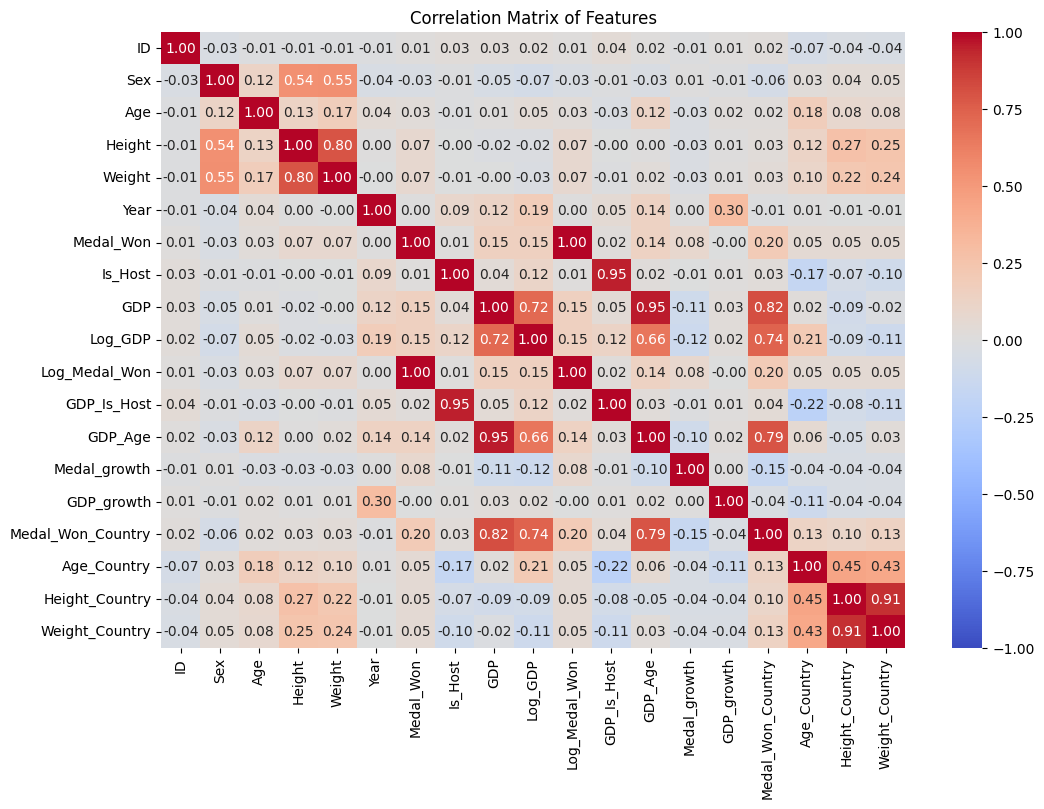

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation analysis
numeric_cols = df_test.select_dtypes(include=['number']).columns
df_numeric = df_test[numeric_cols]

# Generate the correlation matrix
corr_matrix = df_numeric.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()


Here's a clearer, more structured breakdown of the **Key Insights** from your correlation matrix:

---

### **Key Insights from the Data:**

---

#### **What's Important for Predicting Medals:**

1. **GDP and Economic Growth**:
   - **GDP** has a **moderate positive correlation (0.15)** with `Medal_Won`. This means wealthier countries are more likely to win medals, possibly due to better infrastructure, training, and facilities.
   - **Log_GDP** (logarithmic scale of GDP) shows a similar relationship with medal wins (**0.15**), reinforcing the idea that economic strength plays a role in athletic success.
   
2. **Past Medal Performance**:
   - **Medal_Won_Country** (previous medal performance) shows a **strong positive correlation** with `GDP` (**0.82**) and `Log_GDP` (**0.74**), suggesting that countries with a history of winning medals are more likely to continue winning.

3. **Host Country Advantage**:
   - **Is_Host** has a **weak positive correlation (0.05)** with `Medal_Won`. Hosting the Olympics may provide a small advantage to countries in terms of winning medals, possibly due to home advantage, motivated athletes, or better facilities.

4. **Age and Athlete Demographics**:
   - **Age_Country** shows a moderate positive correlation (0.18) with `Medal_Won`, indicating that the average age of athletes in a country could be a factor—perhaps younger athletes have better performances or more countries have athletes in their peak years.

---

#### **Less Impactful Features:**

1. **Medal Growth**:
   - **Medal_growth** has a **weak negative correlation (-0.01)** with `Medal_Won`, suggesting that the growth in medals over time does not strongly predict future wins.

2. **Height and Weight**:
   - **Height** and **Weight** show weak correlations with `Medal_Won`, ranging from **0.05 to 0.07**, which means that overall physical attributes like height and weight have less direct influence on predicting medals.

3. **GDP Growth**:
   - **GDP_growth** has a very weak positive correlation (**0.003**) with `Medal_Won`, indicating that economic growth doesn't significantly impact medal wins in a given year.

---

#### **Feature Selection for Modeling:**

---

**- Important Features for Prediction:**
1. **GDP**: High correlation with `Medal_Won`, indicating that economic strength is a predictor for medal success.
2. **Log_GDP**: Similar to GDP, this can capture the effects of large-scale economic development.
3. **Medal_Won_Country**: Countries with previous medals are more likely to win medals again.
4. **Is_Host**: Hosting the Olympics can provide a slight advantage.
5. **Age_Country**: Age demographics could influence athletic performance.
6. **Height_Country** and **Weight_Country**: Physical attributes of athletes in the country have small but notable impacts on success.

**- Features to Exclude:**
1. **Medal_growth**: Very weak or negative relationship with medal wins.
2. **GDP_growth**: Little to no predictive value.
3. **Sex**: No significant impact on medal prediction.
4. **Year**: This feature doesn't show strong correlations with medal performance.
5. **ID**: Represents just a unique identifier for the data, not a predictive factor.
6. **Log_Medal_Won**: Redundant with the original `Medal_Won`.

---

### **Conclusion**:
Focus on features that have a meaningful correlation with medal success, like GDP, previous medal performance, and being a host country. You can exclude less impactful features, such as `Medal_growth`, `GDP_growth`, and redundant ones like `Log_Medal_Won` for better model performance.

### Step 5: Model Preparation

In [116]:
from sklearn.model_selection import train_test_split

# Select relevant features for prediction based on correlation analysis
features = ['Log_GDP', 'GDP_Age', 'Log_Medal_Won', 'Medal_growth']  # Use the selected features
X = df_test[features]  # Features
y = df_test['Medal_Won']  # Target variable (Medals won)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [127]:
df_test['Weight_Country'].isna().sum()

0

### Model 1 - Logistic Regression

In [132]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Prepare the data
X = df_test[['GDP', 'Medal_Won_Country', 'Is_Host', 'Age_Country', 'Height_Country', 'Weight_Country']]
y = df_test['Medal_Won']

# Handle missing values if any, for example:
# X = X.fillna(X.mean())  # Or use median, or drop rows with NaN if necessary

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.85
Confusion Matrix:
 [[12373     0]
 [ 2179     0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     12373
         1.0       0.00      0.00      0.00      2179

    accuracy                           0.85     14552
   macro avg       0.43      0.50      0.46     14552
weighted avg       0.72      0.85      0.78     14552



c:\Users\12167\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\12167\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\12167\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

This model's performance can be understood by examining the key metrics:

1. **Accuracy**: The model has an accuracy of **85%**, which sounds good at first, but accuracy alone can be misleading, especially when there is a class imbalance (i.e., the two classes are not equally represented).

2. **Confusion Matrix**:
   - **True negatives (TN)**: 12,373 (correctly predicted class 0, the majority class).
   - **False positives (FP)**: 0 (no incorrect predictions of class 1 when the true class is 0).
   - **False negatives (FN)**: 2,179 (incorrectly predicted class 0 when the true class is 1).
   - **True positives (TP)**: 0 (no correct predictions of class 1).

3. **Precision, Recall, and F1-score** for Class 0 (the majority class):
   - **Precision**: 0.85 (out of all instances predicted as class 0, 85% were correct).
   - **Recall**: 1.00 (all actual class 0 instances were correctly identified).
   - **F1-score**: 0.92 (a balanced metric that combines precision and recall, indicating good performance for class 0).

4. **Precision, Recall, and F1-score** for Class 1 (the minority class):
   - **Precision**: 0.00 (none of the predicted class 1 instances were correct).
   - **Recall**: 0.00 (none of the actual class 1 instances were correctly identified).
   - **F1-score**: 0.00 (no performance for class 1 at all).

5. **Macro Average**:
   - This averages the performance metrics across all classes, regardless of class distribution. The results show a **poor average** (0.46 F1-score), reflecting the failure to predict class 1 correctly.

6. **Weighted Average**:
   - This takes into account the imbalance of class sizes. While the model performs well for class 0, it performs poorly for class 1, as shown in the **weighted average F1-score of 0.78**.

### Conclusion:
The model is **good at predicting the majority class (class 0)**, but it **fails completely** to predict the minority class (class 1). The **imbalance in performance** is highlighted by the confusion matrix and classification report, where it completely misses class 1 predictions (both precision and recall are 0 for class 1).

To improve:
- Address class imbalance (using techniques like oversampling, undersampling, or adjusting class weights).
- Consider using other performance metrics like the **F1-score** for a more balanced evaluation.

### Model 2 - Random Forest 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.59      0.72     12373
         1.0       0.24      0.73      0.36      2179

    accuracy                           0.61     14552
   macro avg       0.58      0.66      0.54     14552
weighted avg       0.82      0.61      0.67     14552

ROC-AUC Score: 0.7118
Confusion Matrix:
[[7307 5066]
 [ 598 1581]]


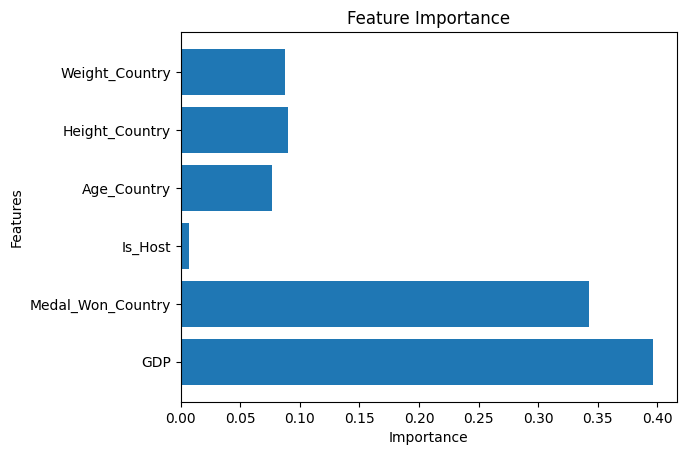

Cross-validation accuracy: 0.6739


In [134]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have your features X and labels y
# X = your features, y = your target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Initialize the RandomForestClassifier with class_weight='balanced'
rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)

# Step 3: Train the model on the resampled dataset
rf.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate the model on the test set
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # probability of class 1

# Step 5: Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 8: Feature importance
feature_importances = rf.feature_importances_
plt.barh(X_train.columns, feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Step 9: Cross-validation accuracy score
cross_val_scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy: {cross_val_scores.mean():.4f}')


### Why not Linear Regression
---
### **1. Linear Regression for Classification**
   - **Not Suitable for Classification**:  
     Linear regression is designed to predict **continuous** values, not binary categories (0 or 1).
   - **Issues**:  
     - Outputs values outside the [0, 1] range.
     - Doesn't produce probabilities that are useful for classification.
     - Requires additional steps (like thresholding) to turn continuous predictions into class labels.
---
### **Summary**
- **Linear Regression** is not suitable for binary classification.
- **Logistic Regression** is the **ideal choice** for binary classification because it produces probabilities and works well for imbalanced data.
- **Random Forest** is a **strong alternative** when you need to handle complex relationships and imbalanced data effectively.

